# Example problem - Ackley objective function

The Ackley function is an example of a multimodal objective function that has a single global optima and multiple local optima in which a local search might get stuck.

### objective function
def objective(x, y):<br>&nbsp;
    return -20.0 * exp(-0.2 * sqrt(0.5 * ($x^{2}$ + $y^{2}$))) - exp(0.5 * (cos(2 * pi * x) + cos(2 * pi * y))) + e + 20

- creates a three-dimensional surface plot showing the global optima and multiple local optima.

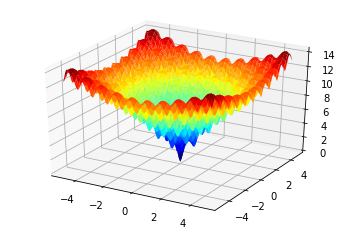

In [1]:
# ackley multimodal function
from numpy import arange
from numpy import exp
from numpy import sqrt
from numpy import cos
from numpy import e
from numpy import pi
from numpy import meshgrid
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
 
# objective function
def objective(x, y):
    return -20.0 * exp(-0.2 * sqrt(0.5 * (x**2 + y**2))) - exp(0.5 * (cos(2 * pi * x) + cos(2 * pi * y))) + e + 20
 
# define range for input
r_min, r_max = -5.0, 5.0
# sample input range uniformly at 0.1 increments
xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a surface plot with the jet color scheme
figure = pyplot.figure()
axis = figure.gca(projection='3d')
axis.plot_surface(x, y, results, cmap='jet')
# show the plot
pyplot.show()

### Stochastic hill climbing example
- Create random sampling of data and candidate solution

In [2]:
from numpy import asarray
from numpy.random import rand
from numpy.random import randn

# define range for input
bounds = asarray([[-5.0, 5.0], [-5.0, 5.0]])

# generate a random point in the search space
solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])

print('solution: ', solution)

step_size = 0.05
# generate a perturbed version of a current working solution
candidate = solution + randn(len(bounds)) * step_size

print('candidate: ', candidate)

solution:  [ 1.99939056 -0.11738646]
candidate:  [ 1.98162677 -0.18452303]


#### Normal hill stochastic climbing function

In [ ]:
# hill climbing local search algorithm
def hillclimbing(objective, bounds, n_iterations, step_size):
    # generate an initial point
    solution = None
    while solution is None or not in_bounds(solution, bounds):
        solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # evaluate the initial point
    solution_eval = objective(solution)
    # run the hill climb
    for i in range(n_iterations):
        # take a step
        candidate = None
        while candidate is None or not in_bounds(candidate, bounds):
            candidate = solution + randn(len(bounds)) * step_size
        # evaluate candidate point
        candidte_eval = objective(candidate)
        # check if we should keep the new point
        if candidte_eval <= solution_eval:
            # store the new point
            solution, solution_eval = candidate, candidte_eval
            # report progress
            print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
    return [solution, solution_eval]


### Complete implementation

In [3]:
# hill climbing search of the ackley objective function
from numpy import asarray
from numpy import exp
from numpy import sqrt
from numpy import cos
from numpy import e
from numpy import pi
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed

# objective function
def objective(v):
    x, y = v
    return -20.0 * exp(-0.2 * sqrt(0.5 * (x**2 + y**2))) - exp(0.5 * (cos(2 * pi * x) + cos(2 * pi * y))) + e + 20

# check if a point is within the bounds of the search
def in_bounds(point, bounds):
    # enumerate all dimensions of the point
    for d in range(len(bounds)):
        # check if out of bounds for this dimension
        if point[d] < bounds[d, 0] or point[d] > bounds[d, 1]:
            return False
    return True

# hill climbing local search algorithm
def hillclimbing(objective, bounds, n_iterations, step_size):
    # generate an initial point
    solution = None
    while solution is None or not in_bounds(solution, bounds):
        solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # evaluate the initial point
    solution_eval = objective(solution)
    # run the hill climb
    for i in range(n_iterations):
        # take a step
        candidate = None
        while candidate is None or not in_bounds(candidate, bounds):
            candidate = solution + randn(len(bounds)) * step_size
        # evaluate candidate point
        candidte_eval = objective(candidate)
        # check if we should keep the new point
        if candidte_eval <= solution_eval:
            # store the new point
            solution, solution_eval = candidate, candidte_eval
            # report progress
            print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
    return [solution, solution_eval]

# seed the pseudorandom number generator
seed(1)
# define range for input
bounds = asarray([[-5.0, 5.0], [-5.0, 5.0]])
# define the total iterations
n_iterations = 1000
# define the maximum step size
step_size = 0.05
# perform the hill climbing search
best, score = hillclimbing(objective, bounds, n_iterations, step_size)
print('Done!')
print('f(%s) = %f' % (best, score))


>0 f([-0.85618854  2.1495965 ]) = 6.46986
>1 f([-0.81291816  2.03451957]) = 6.07149
>5 f([-0.82903902  2.01531685]) = 5.93526
>7 f([-0.83766043  1.97142393]) = 5.82047
>9 f([-0.89269139  2.02866012]) = 5.68283
>12 f([-0.8988359   1.98187164]) = 5.55899
>13 f([-0.9122303   2.00838942]) = 5.55566
>14 f([-0.94681334  1.98855174]) = 5.43024
>15 f([-0.98117198  1.94629146]) = 5.39010
>23 f([-0.97516403  1.97715161]) = 5.38735
>39 f([-0.98628044  1.96711371]) = 5.38241
>362 f([-0.9808789   1.96858459]) = 5.38233
>629 f([-0.98102417  1.96555308]) = 5.38194
Done!
f([-0.98102417  1.96555308]) = 5.381939


### Stochastic Hill Climbing With Random Restarts

The Stochastic Hill Climbing With Random Restarts algorithm involves the repeated running of the Stochastic Hill Climbing algorithm and keeping track of the best solution found.

Modified function as below:
- to take the starting point of the search rather than generating it randomly.

In [ ]:
# hill climbing with random restarts algorithm
def random_restarts(objective, bounds, n_iter, step_size, n_restarts):
    best, best_eval = None, 1e+10
    # enumerate restarts
    for n in range(n_restarts):
        # generate a random initial point for the search
        start_pt = None
        while start_pt is None or not in_bounds(start_pt, bounds):
            start_pt = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
        # perform a stochastic hill climbing search
        solution, solution_eval = hillclimbing(objective, bounds, n_iter, step_size, start_pt)
        # check for new best
        if solution_eval < best_eval:
            best, best_eval = solution, solution_eval
            print('Restart %d, best: f(%s) = %.5f' % (n, best, best_eval))
    return [best, best_eval]

### Complete implementation

In [2]:
# hill climbing search with random restarts of the ackley objective function
from numpy import asarray
from numpy import exp
from numpy import sqrt
from numpy import cos
from numpy import e
from numpy import pi
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed

# objective function
def objective(v):
    x, y = v
    return -20.0 * exp(-0.2 * sqrt(0.5 * (x**2 + y**2))) - exp(0.5 * (cos(2 * pi * x) + cos(2 * pi * y))) + e + 20

# check if a point is within the bounds of the search
def in_bounds(point, bounds):
    # enumerate all dimensions of the point
    for d in range(len(bounds)):
        # check if out of bounds for this dimension
        if point[d] < bounds[d, 0] or point[d] > bounds[d, 1]:
            return False
    return True

# hill climbing local search algorithm
def hillclimbing(objective, bounds, n_iterations, step_size, start_pt):
    # store the initial point
    solution = start_pt
    # evaluate the initial point
    solution_eval = objective(solution)
    # run the hill climb
    for i in range(n_iterations):
        # take a step
        candidate = None
        while candidate is None or not in_bounds(candidate, bounds):
            candidate = solution + randn(len(bounds)) * step_size
        # evaluate candidate point
        candidte_eval = objective(candidate)
        # check if we should keep the new point
        if candidte_eval <= solution_eval:
            # store the new point
            solution, solution_eval = candidate, candidte_eval
    return [solution, solution_eval]

# hill climbing with random restarts algorithm
def random_restarts(objective, bounds, n_iter, step_size, n_restarts):
    best, best_eval = None, 1e+10
    # enumerate restarts
    for n in range(n_restarts):
        # generate a random initial point for the search
        start_pt = None
        while start_pt is None or not in_bounds(start_pt, bounds):
            start_pt = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
        # perform a stochastic hill climbing search
        solution, solution_eval = hillclimbing(objective, bounds, n_iter, step_size, start_pt)
        # check for new best
        if solution_eval < best_eval:
            best, best_eval = solution, solution_eval
            print('Restart %d, best: f(%s) = %.5f' % (n, best, best_eval))
    return [best, best_eval]

# seed the pseudorandom number generator
seed(1)
# define range for input
bounds = asarray([[-5.0, 5.0], [-5.0, 5.0]])
# define the total iterations
n_iter = 1000
# define the maximum step size
step_size = 0.05
# total number of random restarts
n_restarts = 30
# perform the hill climbing search
best, score = random_restarts(objective, bounds, n_iter, step_size, n_restarts)
print('Done!')
print('f(%s) = %f' % (best, score))


Restart 0, best: f([-0.98102417  1.96555308]) = 5.38194
Restart 2, best: f([1.96522236 0.98120013]) = 5.38191
Restart 4, best: f([0.00223194 0.00258853]) = 0.00998
Done!
f([0.00223194 0.00258853]) = 0.009978


# Iterated Local Search Algorithm
- modified version of the stochastic hill climbing with random restarts algorithm.

- generate an initial point as a perturbed version of the last best:

    start_pt = None

    while start_pt is None or not in_bounds(start_pt, bounds):

	start_pt = best + randn(len(bounds)) * p_size
    
### The function

In [ ]:
# iterated local search algorithm
def iterated_local_search(objective, bounds, n_iter, step_size, n_restarts, p_size):
    # define starting point
    best = None
    while best is None or not in_bounds(best, bounds):
        best = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # evaluate current best point
    best_eval = objective(best)
    # enumerate restarts
    for n in range(n_restarts):
        # generate an initial point as a perturbed version of the last best
        start_pt = None
        while start_pt is None or not in_bounds(start_pt, bounds):
            start_pt = best + randn(len(bounds)) * p_size
        # perform a stochastic hill climbing search
        solution, solution_eval = hillclimbing(objective, bounds, n_iter, step_size, start_pt)
        # check for new best
        if solution_eval < best_eval:
            best, best_eval = solution, solution_eval
            print('Restart %d, best: f(%s) = %.5f' % (n, best, best_eval))
    return [best, best_eval]


## Complete implementation

In [1]:
# iterated local search of the ackley objective function
from numpy import asarray
from numpy import exp
from numpy import sqrt
from numpy import cos
from numpy import e
from numpy import pi
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed

# objective function
def objective(v):
    x, y = v
    return -20.0 * exp(-0.2 * sqrt(0.5 * (x**2 + y**2))) - exp(0.5 * (cos(2 * pi * x) + cos(2 * pi * y))) + e + 20

# check if a point is within the bounds of the search
def in_bounds(point, bounds):
    # enumerate all dimensions of the point
    for d in range(len(bounds)):
        # check if out of bounds for this dimension
        if point[d] < bounds[d, 0] or point[d] > bounds[d, 1]:
            return False
    return True

# hill climbing local search algorithm
def hillclimbing(objective, bounds, n_iterations, step_size, start_pt):
    # store the initial point
    solution = start_pt
    # evaluate the initial point
    solution_eval = objective(solution)
    # run the hill climb
    for i in range(n_iterations):
        # take a step
        candidate = None
        while candidate is None or not in_bounds(candidate, bounds):
            candidate = solution + randn(len(bounds)) * step_size
        # evaluate candidate point
        candidte_eval = objective(candidate)
        # check if we should keep the new point
        if candidte_eval <= solution_eval:
            # store the new point
            solution, solution_eval = candidate, candidte_eval
    return [solution, solution_eval]

# iterated local search algorithm
def iterated_local_search(objective, bounds, n_iter, step_size, n_restarts, p_size):
    # define starting point
    best = None
    while best is None or not in_bounds(best, bounds):
        best = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # evaluate current best point
    best_eval = objective(best)
    # enumerate restarts
    for n in range(n_restarts):
        # generate an initial point as a perturbed version of the last best
        start_pt = None
        while start_pt is None or not in_bounds(start_pt, bounds):
            start_pt = best + randn(len(bounds)) * p_size
        # perform a stochastic hill climbing search
        solution, solution_eval = hillclimbing(objective, bounds, n_iter, step_size, start_pt)
        # check for new best
        if solution_eval < best_eval:
            best, best_eval = solution, solution_eval
            print('Restart %d, best: f(%s) = %.5f' % (n, best, best_eval))
    return [best, best_eval]

# seed the pseudorandom number generator
seed(1)
# define range for input
bounds = asarray([[-5.0, 5.0], [-5.0, 5.0]])
# define the total iterations
n_iter = 1000
# define the maximum step size
s_size = 0.05
# total number of random restarts
n_restarts = 30
# perturbation step size
p_size = 1.0
# perform the hill climbing search
best, score = iterated_local_search(objective, bounds, n_iter, s_size, n_restarts, p_size)
print('Done!')
print('f(%s) = %f' % (best, score))


Restart 0, best: f([-0.96775653  0.96853129]) = 3.57447
Restart 3, best: f([-4.50618519e-04  9.51020713e-01]) = 2.57996
Restart 5, best: f([ 0.00137423 -0.00047059]) = 0.00416
Restart 22, best: f([ 1.16431936e-04 -3.31358206e-06]) = 0.00033
Done!
f([ 1.16431936e-04 -3.31358206e-06]) = 0.000330
